# Definitions
- Definir estações
- Artigo para ler: https://latamt.ieeer9.org/index.php/transactions/article/view/5563
- Plotar hora a hora, e o describe
- Transformação logaritmica, para variacia não constante?
- Método Box-Cox ou deflacionar a série
- Modelar a serie temporal
  - Normality hypothesis tests, Anderson-Darling and Shapiro-Wilk
  - Decompor em 3 partes: tendência, sazonalidade e resíduo
- Aplicar estacionariedade
- Verificar precipitação, quando tiver.
- A press atmo do nivel da estacao ja é a media
- Usar temp. Bulbo seco
- Agrupar por estacoes do ano (verao, inverno, etc)
- Corte as 5h as 21h
- Verificar umidade no litoral
- Pegar estacoes proximas, ir do litoral ao interior
- Pegar principalmente duas regioes (bahia e sul, por exemplo)
- Transfer learning entre estacoes nas regioes


### Escolhendo estações
Iremos escolher duas regiões:
- Bahia, pegando algumas estações (umas 3) e indo do litoral até o interior.
- RS, com o mesmo comportamento da primeira.

Bahia:
- A401
- A413
- A440

RS:
- A801
- A840
- A893

Nesse Notebook, analisaremos os dados da estação A401 (Salvador, Bahia), que fica no litoral.


### Imports

In [2]:
%run Utils.ipynb

In [183]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
dict_files = get_files(n=None)

In [85]:
# dict_files.keys()
print(dict_files["A401"][0])

REGIAO:;NE
UF:;BA
ESTACAO:;SALVADOR
CODIGO (WMO):;A401
LATITUDE:;-13,005515
LONGITUDE:;-38,50576
ALTITUDE:;47,56
DATA DE FUNDACAO:;13/05/00



In [6]:
dict_files["A401"][1]

'data/estacoes_solares/2023/INMET_NE_BA_A401_SALVADOR_01-01-2023_A_31-12-2023.CSV'

### Pre processamento

In [87]:
df = load(dict_files["A401"][1])
df = renameDatasetColumns(df)
df = transform_datetime(df)
df = create_datetime_feature(df)
df = create_split_date_features(df)
df = removeNulls(df, "radiacao")
df = change_types(df)

In [88]:
df.head().T

,9,10,11,12,13
precipitação_total_horário_mm,0.0,0.2,0.0,0.0,0.0
pressao_atmosferica_ao_nivel_da_estacao_horaria_mb,1008.2,1008.8,1009.4,1009.4,1009.3
pressão_atmosferica_max_na_hora_ant_aut_mb,1008.2,1008.8,1009.4,1009.6,1009.4
pressão_atmosferica_min_na_hora_ant_aut_mb,1007.8,1008.2,1008.8,1009.3,1009.3
radiacao,47.4,166.5,1081.6,1700.4,2894.6
temperatura_do_ar_bulbo_seco_horaria_c,24.0,25.4,27.8,28.6,29.6
temperatura_do_ponto_de_orvalho_c,22.7,23.7,22.7,23.5,23.8
temperatura_máxima_na_hora_ant_aut_c,24.0,25.5,28.5,28.6,29.7
temperatura_mínima_na_hora_ant_aut_c,23.7,24.0,25.3,26.9,28.4
temperatura_orvalho_max_na_hora_ant_aut_c,22.7,23.9,24.6,23.8,24.2


### Algumas estatisticas

In [125]:
numerics = ['float16', 'float32', 'float64']

df.select_dtypes(include=numerics).describe().T

,count,mean,std,min,25%,50%,75%,max
precipitação_total_horário_mm,4735.0,0.190539,1.282495,0.0,0.0,0.0,0.00,38.4
pressao_atmosferica_ao_nivel_da_estacao_horaria_mb,4735.0,1008.944688,2.872539,999.7,1006.9,1008.6,1010.90,1018.2
pressão_atmosferica_max_na_hora_ant_aut_mb,4735.0,1009.215143,2.848353,999.9,1007.2,1008.9,1011.15,1018.3
pressão_atmosferica_min_na_hora_ant_aut_mb,4735.0,1008.717297,2.846851,999.5,1006.7,1008.4,1010.70,1018.0
radiacao,4735.0,1374.269673,1125.560423,0.0,293.2,1223.6,2279.20,4202.3
temperatura_do_ar_bulbo_seco_horaria_c,4735.0,27.090053,2.316885,20.5,25.3,27.0,28.80,33.8
temperatura_do_ponto_de_orvalho_c,4735.0,22.027117,1.407656,15.2,21.1,22.2,23.00,26.2
temperatura_máxima_na_hora_ant_aut_c,4735.0,27.750433,2.447802,20.7,25.8,27.8,29.70,34.1
temperatura_mínima_na_hora_ant_aut_c,4735.0,26.347392,2.236428,20.5,24.6,26.3,28.00,32.4
temperatura_orvalho_max_na_hora_ant_aut_c,4735.0,22.663506,1.425742,16.2,21.8,22.8,23.70,27.4


### Plot por mes

<Axes: xlabel='mes', ylabel='mean'>

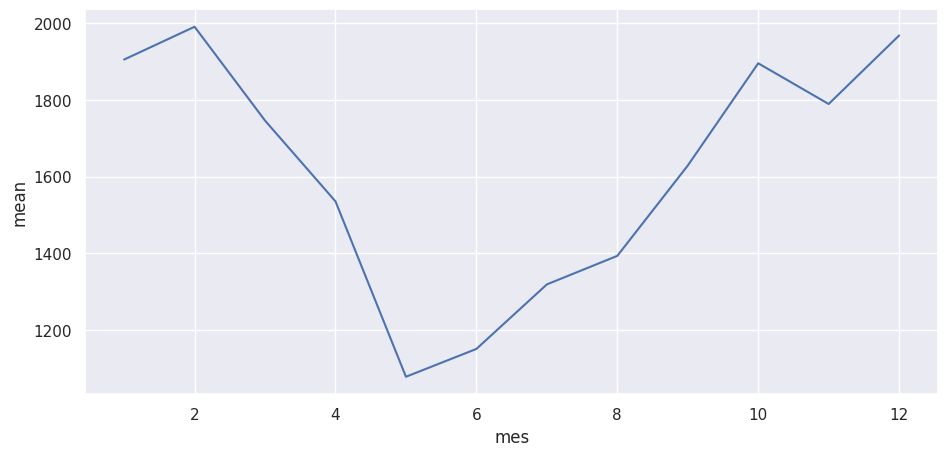

In [128]:
set_plot_size(11, 5)
df_month = filter_between(df, "hora", 10, 20)

df_month = df_month[["mes", "radiacao"]].groupby(['mes'])\
['radiacao'].agg(['mean','std']).reset_index()

sns.lineplot(data=df_month, x=df_month["mes"], y=df_month["mean"])

### Por hora

<Axes: xlabel='hora', ylabel='radiacao'>

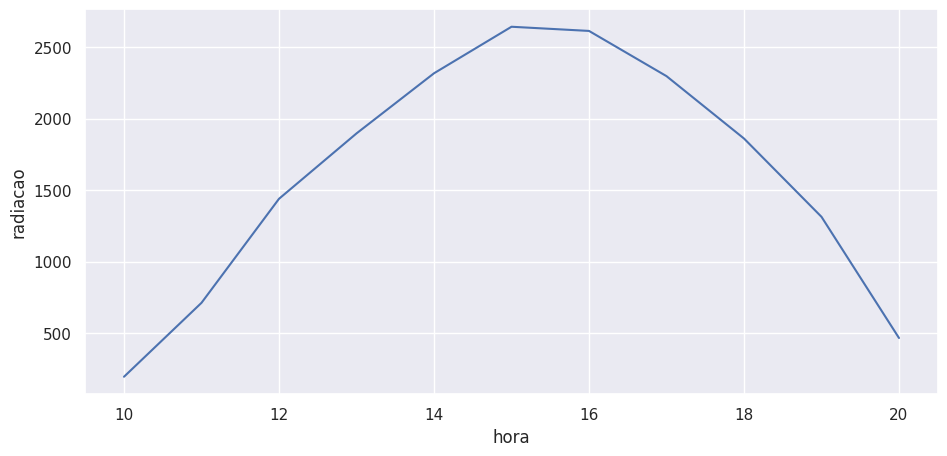

In [131]:
df_hour = filter_between(df, "hora", 10, 20)

df_hour = df_hour[["hora", "radiacao"]].groupby(['hora']).mean().reset_index()

sns.lineplot(data=df_hour, x=df_hour["hora"], y=df_hour["radiacao"])

#### Hora com o vento como `hue`

[ 0.7  4.   5.   6.  14.5]


<Axes: xlabel='hora', ylabel='radiacao'>

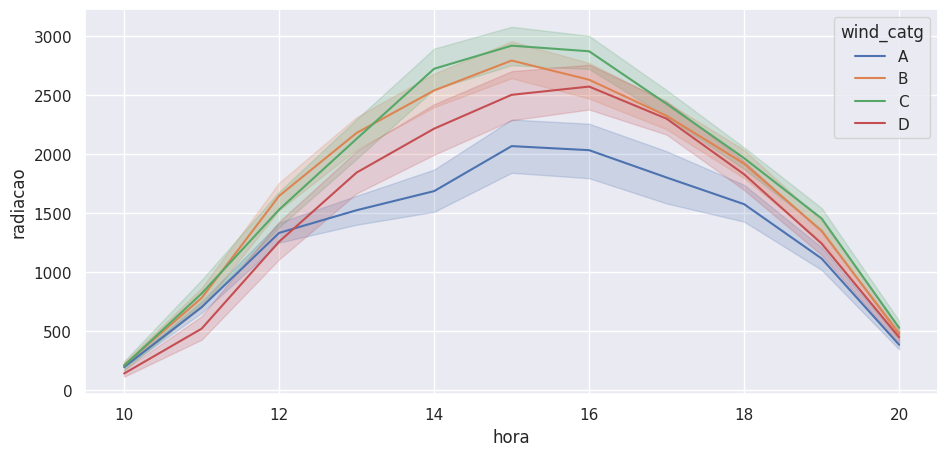

In [134]:
df_hour_wind = filter_between(df, "hora", 10, 20)
df_hour_wind = df_hour_wind[[
    "hora", 
    "radiacao", 
    "vento_rajada_maxima_ms"]]\
.fillna(0)

df_hour_wind["wind_catg"] = create_category("vento_rajada_maxima_ms", df_hour_wind)
sns.lineplot(data=df_hour_wind, x=df_hour_wind["hora"], y=df_hour_wind["radiacao"], hue=df_hour_wind["wind_catg"])

#### Hora com a pressão atmo. como `hue`

[ 999.7 1007.  1008.8 1011.  1018.2]


<Axes: xlabel='hora', ylabel='radiacao'>

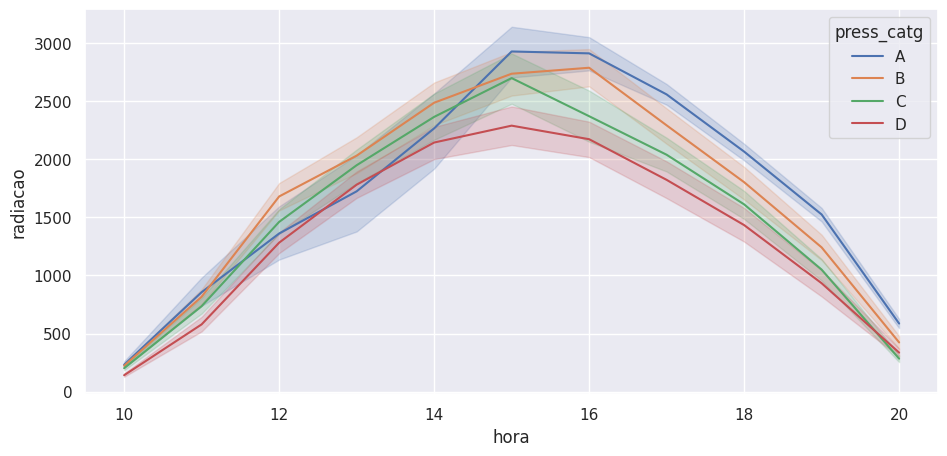

In [138]:
df_hour_press = filter_between(df, "hora", 10, 20)
df_hour_press = df_hour_press[[
    "hora", 
    "radiacao", 
    "pressao_atmosferica_ao_nivel_da_estacao_horaria_mb"]]\
.fillna(0)

df_hour_press["press_catg"] = create_category("pressao_atmosferica_ao_nivel_da_estacao_horaria_mb", df_hour_press)
sns.lineplot(data=df_hour_press, x=df_hour_press["hora"], y=df_hour_press["radiacao"], hue=df_hour_press["press_catg"])

#### Hora com a temperatura como `hue`

[20.9 25.8 27.5 29.2 33.8]


<Axes: xlabel='hora', ylabel='radiacao'>

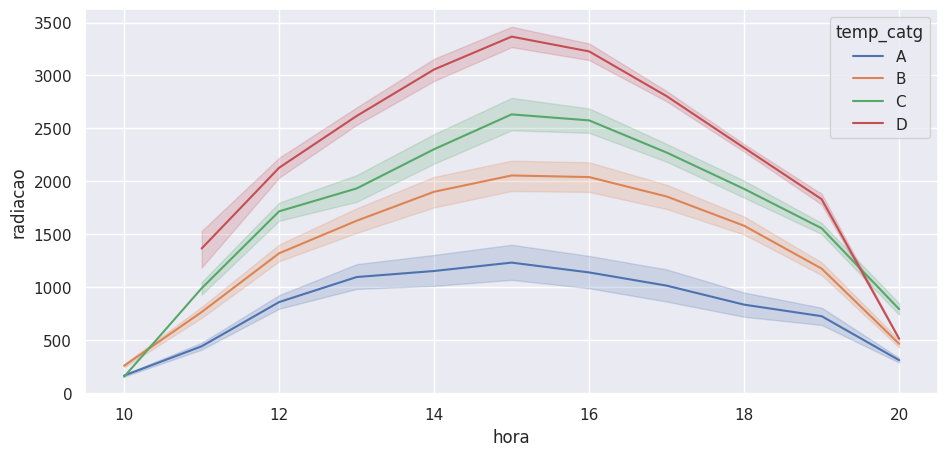

In [142]:
df_temp = filter_between(df, "hora", 10, 20)

df_temp = df_temp[[
    "hora", 
    "radiacao", 
    "temperatura_do_ar_bulbo_seco_horaria_c"]]\
.fillna(0)

df_temp["temp_catg"] = create_category("temperatura_do_ar_bulbo_seco_horaria_c", df_temp)
sns.lineplot(data=df_temp, x=df_temp["hora"], y=df_temp["radiacao"], hue=df_temp["temp_catg"])

#### Hora com a umidade como `hue`

[43. 65. 72. 81. 96.]


<Axes: xlabel='hora', ylabel='radiacao'>

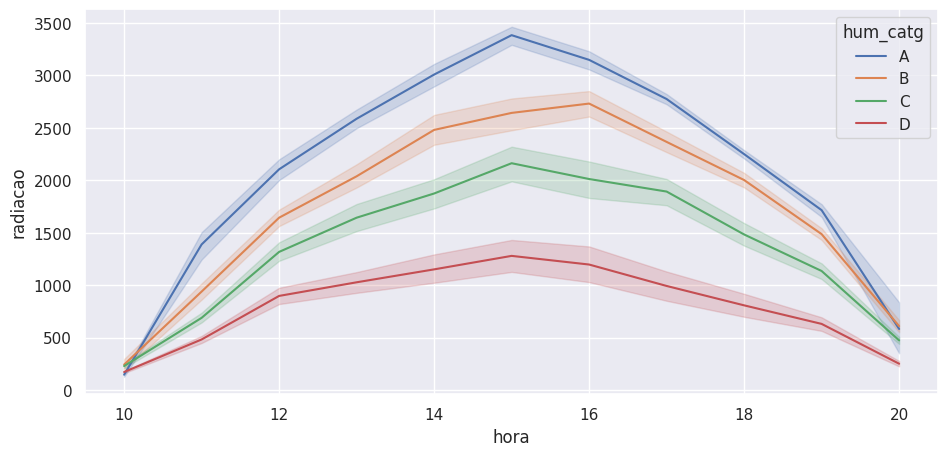

In [147]:
df_hum = filter_between(df, "hora", 10, 20)

df_hum = df_hum[[
    "hora", 
    "radiacao", 
    "umidade_relativa_do_ar_horaria_perc"]]\
.fillna(0)

df_hum["hum_catg"] = create_category("umidade_relativa_do_ar_horaria_perc", df_hum)
sns.lineplot(data=df_hum, x=df_hum["hora"], y=df_hum["radiacao"], hue=df_hum["hum_catg"])

#### Relação linear entre radiação e vento 

<Axes: xlabel='vento_velocidade_horaria_ms', ylabel='radiacao'>

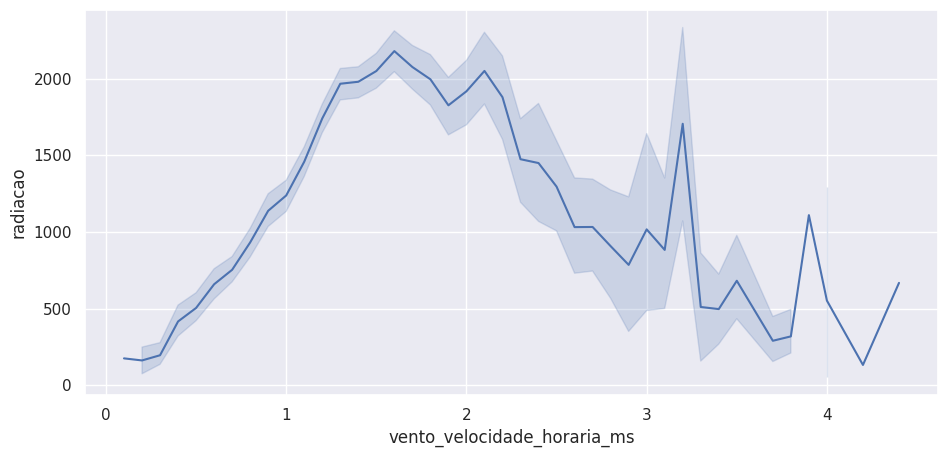

In [155]:
df_rel_wind = filter_between(df, "hora", 10, 20)
sns.lineplot(data=df_rel_wind, x=df_rel_wind["vento_velocidade_horaria_ms"], y=df_rel_wind["radiacao"])

#### Relação linear entre radiação e a umidade 

<Axes: xlabel='umidade_relativa_do_ar_horaria_perc', ylabel='radiacao'>

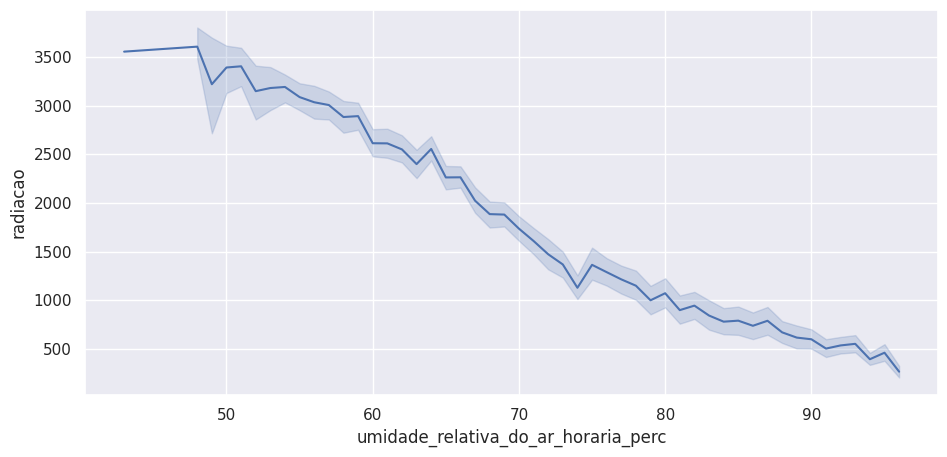

In [156]:
df_rel_hum = filter_between(df, "hora", 10, 20)
sns.lineplot(data=df_rel_hum, x=df_rel_hum["umidade_relativa_do_ar_horaria_perc"], y=df_rel_hum["radiacao"])

### Serie temporal ao longo do ano

<Axes: xlabel='data', ylabel='radiacao'>

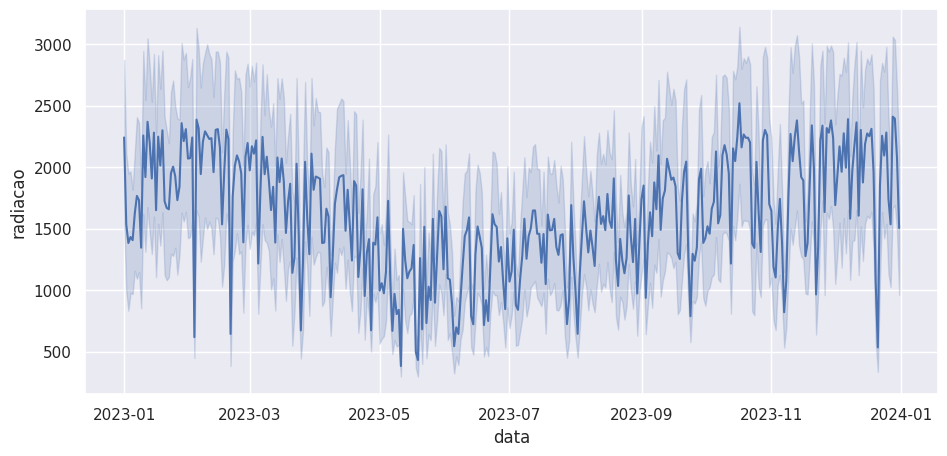

In [173]:
df_test = filter_between(df, "hora", 10, 20)
sns.lineplot(data=df_test, x="data", y="radiacao")

### Em uma semana

<Axes: xlabel='data_hora', ylabel='radiacao'>

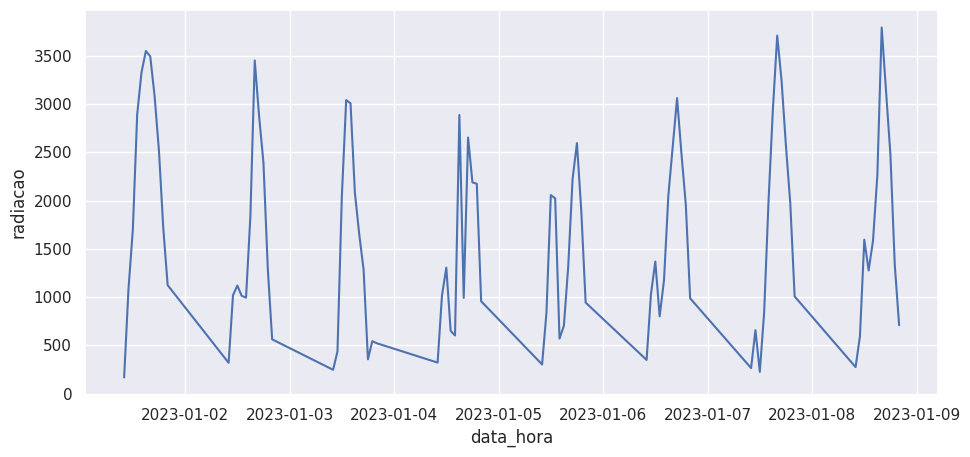

In [97]:
df_test = filter_between(df, "hora", 10, 20)
df_test = filter_between(df_test, "data", "2023-01-01", "2023-01-08")
df_test["rad_mean"] = df_test["radiacao"].mean()
sns.lineplot(data=df_test, x="data_hora", y="radiacao")

### Verão

<Axes: xlabel='data', ylabel='radiacao'>

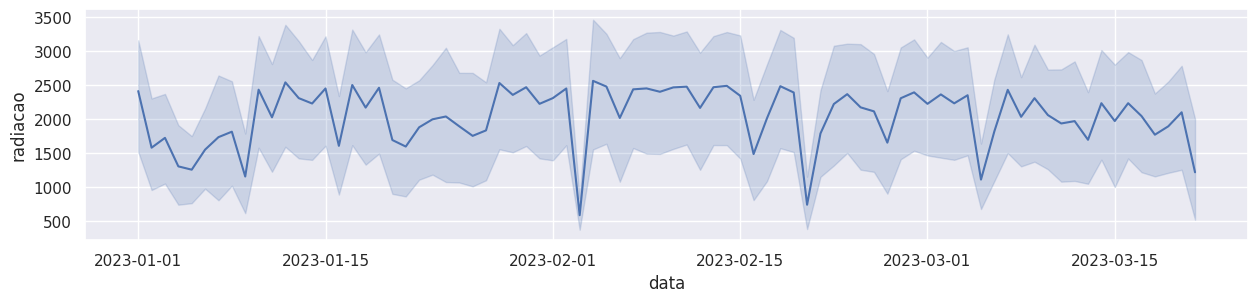

In [188]:
set_plot_size(15, 3)
df_summer = filter_between(df, "data", "2023-01-01", "2023-03-21")
df_summer = filter_between(df_summer, "hora", 10, 17)

sns.lineplot(data=df_summer, x="data", y="radiacao")

### Outono

<Axes: xlabel='data', ylabel='radiacao'>

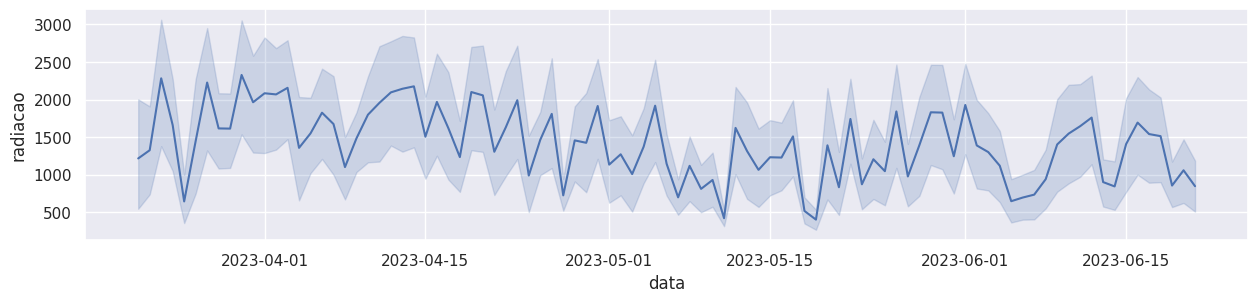

In [66]:
set_plot_size(15, 3)
df_test = filter_between(df, "data", "2023-03-21", "2023-06-21")
df_test = filter_between(df_test, "hora", 10, 17)

sns.lineplot(data=df_test, x="data", y="radiacao")

### Inverno

<Axes: xlabel='data', ylabel='radiacao'>

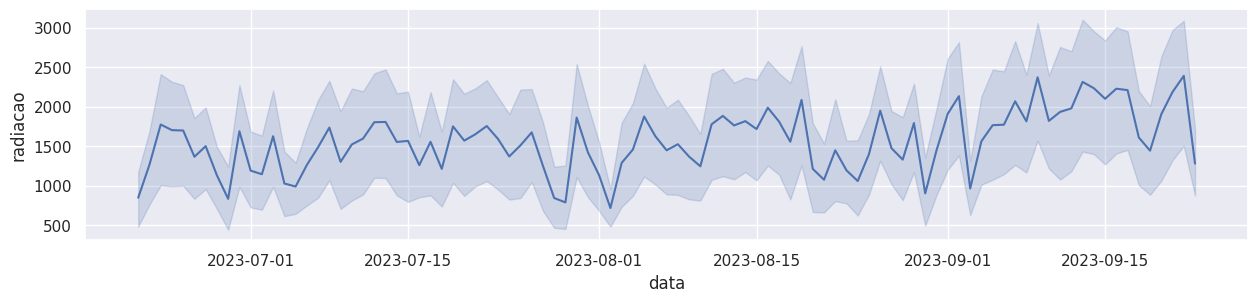

In [67]:
set_plot_size(15, 3)
df_test = filter_between(df, "data", "2023-06-21", "2023-09-23")
df_test = filter_between(df_test, "hora", 10, 17)

sns.lineplot(data=df_test, x="data", y="radiacao")

### Primavera

<Axes: xlabel='data', ylabel='radiacao'>

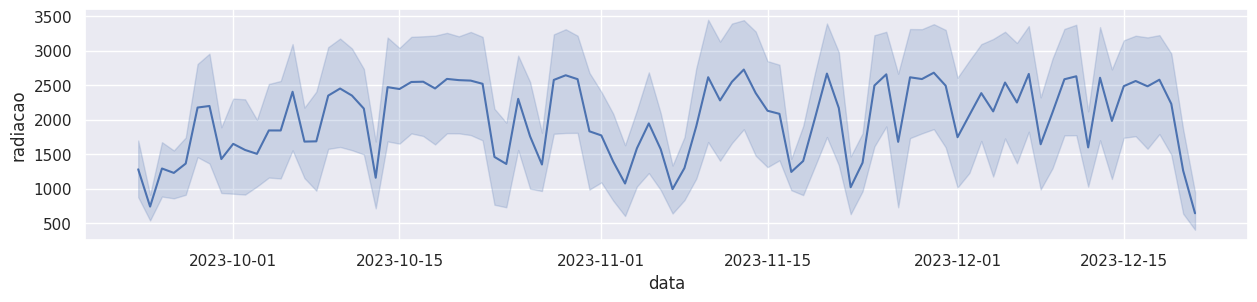

In [68]:
set_plot_size(15, 3)
df_test = filter_between(df, "data", "2023-09-23", "2023-12-21")
df_test = filter_between(df_test, "hora", 10, 17)

sns.lineplot(data=df_test, x="data", y="radiacao")

### Media movel

<Axes: xlabel='data', ylabel='media_movel'>

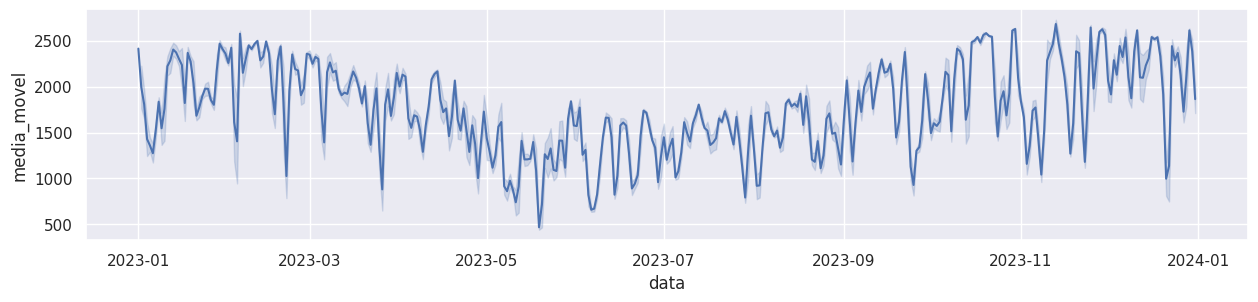

In [195]:
df_test = filter_between(df, "hora", 10, 17)
df_test["media_movel"] = df_test.radiacao.rolling(8).mean()
sns.lineplot(data=df_test, x="data", y="media_movel")

### Aumento e aceleração

<Axes: xlabel='data', ylabel='aumento'>

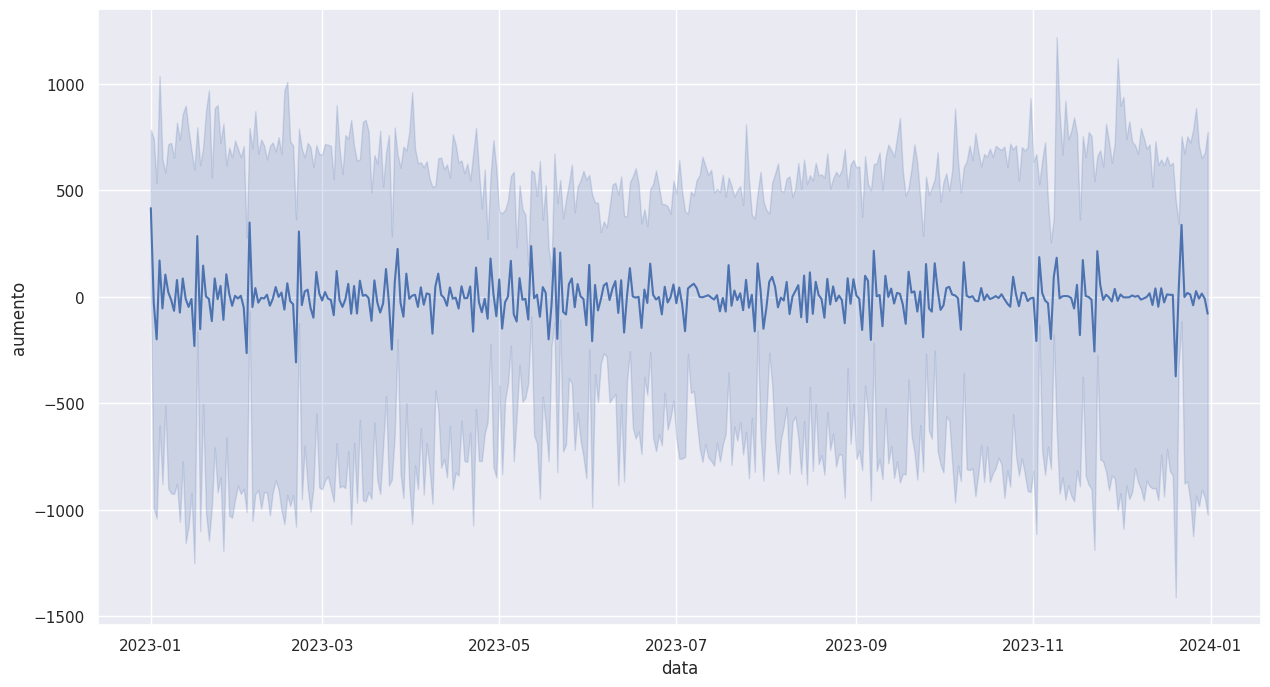

In [179]:
df_test = filter_between(df, "hora", 10, 17)
df_test['aumento'] = df_test.radiacao.diff()
sns.lineplot(data=df_test, x="data", y="aumento")

<Axes: xlabel='data', ylabel='aceleracao'>

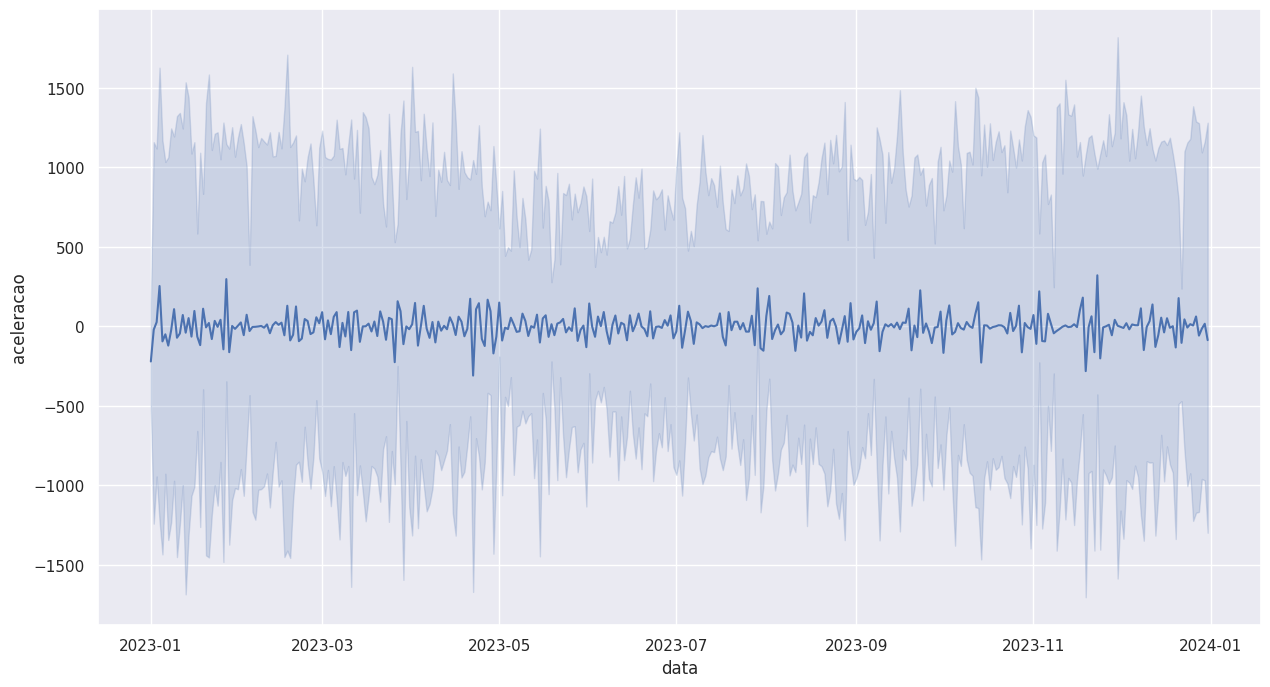

In [180]:
df_test['aceleracao'] = df_test.aumento.diff()
sns.lineplot(data=df_test, x="data", y="aceleracao")

### Autocorrelação

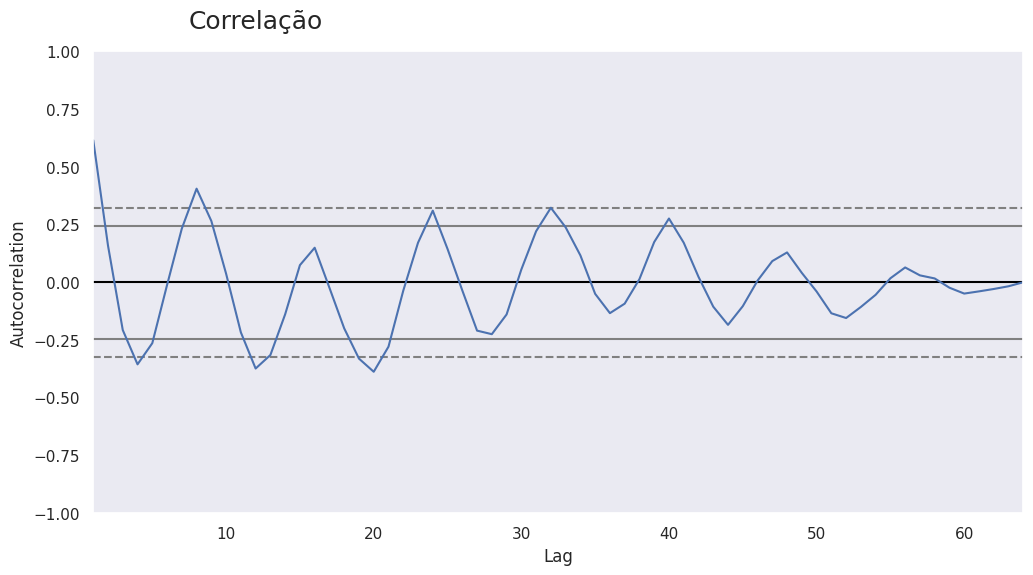

In [196]:
df_test = filter_between(df, "hora", 10, 17)
df_test = filter_between(df_test, "data", "2023-03-21", "2023-03-28")
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_test.radiacao)
ax=ax

### Decomposição

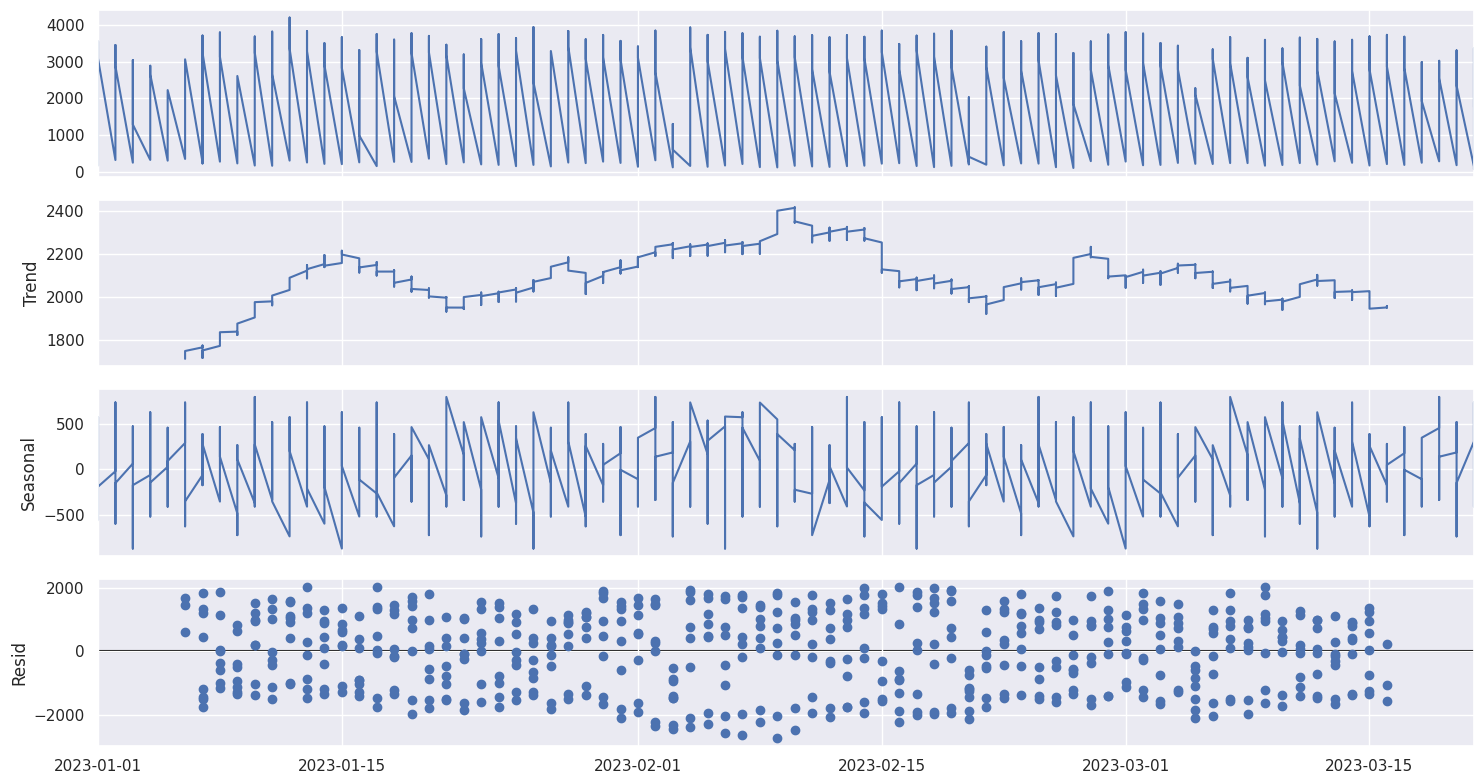

In [199]:
set_plot_size(15, 8)
df_test = filter_between(df, "hora", 10, 17)
df_test = filter_between(df_test, "data", "2023-01-01", "2023-03-21")

resultado = seasonal_decompose(df_test[["radiacao", "data"]].set_index('data'), period=90)
ax = resultado.plot()

### Teste de estacionariedade

In [200]:
result = adfuller(df_test["radiacao"], autolag="AIC")
print('Estatística ADF: {:0.2f}'.format(result[0]))
print('Número de atrasos: {}'.format(result[2]))
print('Valor p: {:0.3f}'.format(result[1]))
for key, value in result[4].items():
    print('Valores críticos:')
    print("{}, {:0.2f}".format(key,value))

Estatística ADF: -5.19
Número de atrasos: 17
Valor p: 0.000
Valores críticos:
1%, -3.44
Valores críticos:
5%, -2.87
Valores críticos:
10%, -2.57


### Box-Cox

In [170]:
# Importar bibliotecas
from scipy.stats import boxcox
# Calcular melhor valor de lambda para a série temporal
df_box_cox = filter_between(df, "data", "2023-01-01", "2023-03-21")
df_box_cox = filter_between(df_box_cox, "hora", 10, 17)
serie_temporal2, lambda_boxcox = boxcox(df_box_cox["radiacao"])

In [171]:
df_box_cox["rad"] = serie_temporal2

<Axes: xlabel='data', ylabel='rad'>

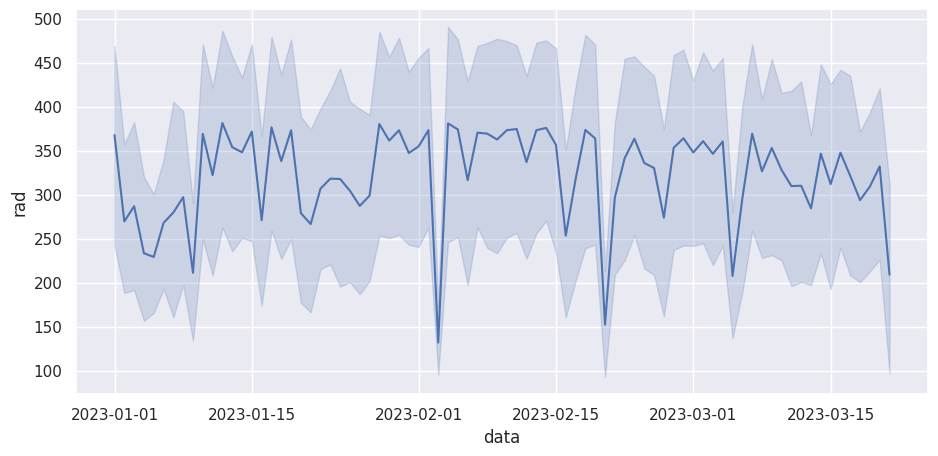

In [172]:
set_plot_size(11, 5)
sns.lineplot(data=df_box_cox, x="data", y="rad")